# AD654 Final Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vendors = pd.read_csv("market_vendors.csv")
boston_hh = pd.read_csv("greater_boston.csv")

## Summary Stats

In [3]:
vendors.head()

,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,1,Artisan Chocolates,Maine,3,9,57.291961,118,0,217.93
1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76


In [4]:
vendors = vendors.loc[vendors["theme"] != "3"]

In [5]:
vendors = vendors.loc[vendors["theme"] != "4"]

In [6]:
vendors = vendors.loc[vendors["theme"] != "5"]

In [7]:
vendors = vendors.loc[vendors["theme"] != "7"]

In [8]:
vendors = vendors.loc[vendors["theme"] != "8"]

In [9]:
vendors = vendors.loc[vendors["theme"] != "9"]

In [10]:
vendors = vendors.loc[vendors["homeState"] != "2"]

In [11]:
vendors = vendors.loc[vendors["homeState"] != "4"]

In [12]:
vendors = vendors.loc[vendors["homeState"] != "5"]

In [13]:
vendors = vendors.loc[vendors["homeState"] != "6"]

In [14]:
vendors = vendors.loc[vendors["homeState"] != "7"]

In [15]:
vendors

,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,1,Artisan Chocolates,Maine,3,9,57.291961,118,0,217.93
1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76
...,...,...,...,...,...,...,...,...,...
687,696,Games Of Chance,Maine,5,7,48.950797,105,1,242.94
688,697,Homemade Gifts,Maine,7,7,33.580079,113,0,250.02
689,698,Homemade Gifts,Maine,4,9,49.226536,118,0,282.52
690,699,Video Game/eSports,Vermont,8,2,64.035786,106,0,234.86


In [16]:
#1
vendors.describe()

,vendorID,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,349.291908,5.114162,5.228324,47.975867,111.361272,0.195087,218.970159
std,202.053170,2.188637,4.936342,13.544075,11.305755,0.396554,35.089505
min,1.000000,0.000000,0.000000,3.069903,82.000000,0.000000,81.290000
25%,173.750000,4.000000,0.000000,39.920280,104.000000,0.000000,194.295000
50%,350.500000,5.000000,4.000000,48.075756,111.000000,0.000000,217.735000
75%,523.250000,7.000000,9.000000,57.372752,119.000000,0.000000,242.735000
max,700.000000,13.000000,20.000000,91.567936,147.000000,1.000000,322.570000


From the above data, we can see that there are 692 suppliers to be considered. Among them, some suppliers have 13 times of carnival experience, and some suppliers have never participated in carnival; some suppliers have never received complaints, and some have received 20 times of complaints, and the average number of complaints received by suppliers is 5.2 times, so we should not consider suppliers with more than 5 times of complaints.

In [17]:
#2
sum1 = vendors.groupby(['theme'])['carnivals'].sum()
sum1

theme
Artisan Chocolates         569
Canadian Snacks            418
Design Your Own T-Shirt    181
Fortune Teller              49
Fried Dough and Pizza      374
Games Of Chance            413
Homemade Gifts             554
Ice Cold Lemonade          144
Local Artists              363
Local Politician            50
Maine Tourism Promotion     71
Specialty Ice Cream        164
Video Game/eSports          92
craft beer                  97
Name: carnivals, dtype: int64

From the above data, we can see that in the past carnivals, Artisan Chocolates, Homemade Gifts, Canadian Snacks and other themed suppliers participated many times, which shows that these themed suppliers have proven to be very popular in the past carnivals, and we can also give more consideration to this carnival.

In [18]:
#3
sum2 = vendors.groupby(['vendorID'],as_index= False)['complaints'].sum()
sum2

,vendorID,complaints
0,1,9
1,2,2
2,3,4
3,4,0
4,5,6
...,...,...
687,696,7
688,697,7
689,698,9
690,699,2


From the above data, we can see that again in the previous carnival, vendorID 3 has not received complaints, while vendorID 1 has received 9 complaints. Therefore, when we invite suppliers to this carnival, we should review its past complaint records and give priority to suppliers without complaint records.

In [19]:
#4
vendors.LL_passholder.value_counts()

0    557
1    135
Name: LL_passholder, dtype: int64

From the above data, we can see that among the 692 suppliers, 135 of them are likely to be Lobster Land passholder, which shows that they are very passionate and knowledgeable about Lobster Land themselves and are likely to do things that are beneficial to our development, so we should focus on considering such suppliers who are Lobster Land passholder.

## Segmentation and Targeting

In [20]:
boston_hh = pd.read_csv("greater_boston.csv")

In [21]:
boston_hh.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,1.0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes
1,2,1.0,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes
2,3,2.0,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No
3,4,1.0,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No
4,5,1.0,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes


In [22]:
boston_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   householdID              15000 non-null  int64  
 1   total_ppl                14925 non-null  float64
 2   own_rent                 15000 non-null  object 
 3   square_foot              15000 non-null  int64  
 4   household_income         15000 non-null  float64
 5   number_pets              15000 non-null  int64  
 6   region                   15000 non-null  object 
 7   entertainment_spend_est  15000 non-null  float64
 8   travel_spend_est         15000 non-null  float64
 9   under_12                 14925 non-null  float64
 10  LL_passholder            15000 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 1.3+ MB


In [23]:
boston_hh.isnull().sum()

householdID                 0
total_ppl                  75
own_rent                    0
square_foot                 0
household_income            0
number_pets                 0
region                      0
entertainment_spend_est     0
travel_spend_est            0
under_12                   75
LL_passholder               0
dtype: int64

In [24]:
boston_hh['total_ppl'].fillna(round((boston_hh['total_ppl'].mean())), inplace=True)
boston_hh['under_12'].fillna(round((boston_hh['under_12'].mean())), inplace=True)

In [25]:
from collections import Counter
Counter(boston_hh['total_ppl'])
print(Counter(boston_hh['total_ppl']))
print(Counter(boston_hh['under_12']))

Counter({2.0: 6658, 1.0: 5339, 3.0: 1603, 0.0: 1331, 4.0: 69})
Counter({2.0: 6658, 1.0: 5339, 3.0: 1603, 0.0: 1331, 4.0: 69})


In [26]:
np.corrcoef(boston_hh['total_ppl'], boston_hh['under_12'])

array([[1., 1.],
       [1., 1.]])

In [27]:
boston_hh.drop('householdID', 1, inplace=True)
boston_hh.drop('under_12', 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [28]:
boston_hh = boston_hh[boston_hh.total_ppl != 0]

Drop total people equal 0. No sense.

In [29]:
boston_hh.describe()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
count,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000
mean,1.736777,3118.312678,83903.721555,1.509693,3432.427704,3932.332141
std,0.677350,814.964263,25980.479227,0.790082,1244.513671,751.497641
min,1.000000,370.000000,-3078.560000,0.000000,-283.350000,1037.610000
25%,1.000000,2506.000000,65810.210000,1.000000,2556.710000,3438.880000
50%,2.000000,3042.000000,83421.120000,2.000000,3358.690000,3948.540000
75%,2.000000,3737.000000,102058.480000,2.000000,4272.690000,4434.160000
max,4.000000,6081.000000,171989.560000,4.000000,7942.620000,7014.070000


In [30]:
boston_hh.head()

,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,LL_passholder
0,1.0,own,3309,82050.03,1,South Shore,3189.11,3083.41,Yes
1,1.0,own,3814,83077.81,2,MetroWest,4175.35,4713.28,Yes
2,2.0,rent,2592,91401.41,2,North Shore,1814.98,3479.07,No
3,1.0,own,2628,73048.55,1,Middlesex,1945.14,3842.42,No
4,1.0,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,Yes


In [31]:
boston_cluster = boston_hh.iloc[: , [0,2,3,4,6,7]]
boston_cluster.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
0,1.0,3309,82050.03,1,3189.11,3083.41
1,1.0,3814,83077.81,2,4175.35,4713.28
2,2.0,2592,91401.41,2,1814.98,3479.07
3,1.0,2628,73048.55,1,1945.14,3842.42
4,1.0,2442,89145.36,2,4410.86,1913.28


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(boston_cluster)
boston_normalized = scaler.transform(boston_cluster)
boston_normalized = pd.DataFrame(data=boston_normalized, index=boston_cluster.index, columns=boston_cluster.columns)
print(boston_normalized.describe().round(2))

       total_ppl  square_foot  household_income  number_pets  \
count   13669.00     13669.00          13669.00     13669.00   
mean        0.00        -0.00              0.00        -0.00   
std         1.00         1.00              1.00         1.00   
min        -1.09        -3.37             -3.35        -1.91   
25%        -1.09        -0.75             -0.70        -0.65   
50%         0.39        -0.09             -0.02         0.62   
75%         0.39         0.76              0.70         0.62   
max         3.34         3.64              3.39         3.15   

       entertainment_spend_est  travel_spend_est  
count                 13669.00          13669.00  
mean                     -0.00             -0.00  
std                       1.00              1.00  
min                      -2.99             -3.85  
25%                      -0.70             -0.66  
50%                      -0.06              0.02  
75%                       0.68              0.67  
max            

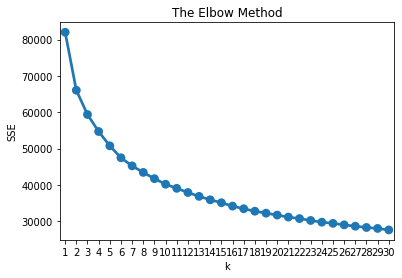

In [33]:
from sklearn.cluster import KMeans
%matplotlib inline
sse = {}
for k in range(1,31):
  kmeans=KMeans(n_clusters=k, random_state=120)
  kmeans.fit(boston_normalized)
  sse[k]=kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In [34]:
kmeans=KMeans(n_clusters=4, random_state=120)
kmeans.fit(boston_normalized)
cluster_labels=kmeans.labels_

In [35]:
boston_4 = boston_cluster.assign(Cluster=cluster_labels)
boston_4.groupby(['Cluster']).agg({
    'total_ppl': 'mean',
    'square_foot': 'mean',
    'household_income': 'mean',
    'number_pets': 'mean',
    'entertainment_spend_est': 'mean',
    'travel_spend_est': ['mean','count'],
}).round(2)

total_ppl square_foot household_income number_pets  \
             mean        mean             mean        mean   
Cluster                                                      
0            1.70     4018.25         87625.10        1.53   
1            1.00     2789.75         73570.58        1.47   
2            1.75     2806.83        109336.11        1.52   
3            2.26     2860.57         66820.84        1.52   

        entertainment_spend_est travel_spend_est        
                           mean             mean count  
Cluster                                                 
0                       3514.00          4533.64  3373  
1                       2884.97          3583.77  2814  
2                       4720.72          4191.28  3395  
3                       2671.88          3460.96  4087

In [36]:
kmeans=KMeans(n_clusters=5, random_state=120)
kmeans.fit(boston_normalized)
cluster_labels=kmeans.labels_

In [37]:
boston_5 = boston_cluster.assign(Cluster=cluster_labels)
boston_5.groupby(['Cluster']).agg({
    'total_ppl': 'mean',
    'square_foot': 'mean',
    'household_income': 'mean',
    'number_pets': 'mean',
    'entertainment_spend_est': 'mean',
    'travel_spend_est': ['mean','count'],
}).round(2)

total_ppl square_foot household_income number_pets  \
             mean        mean             mean        mean   
Cluster                                                      
0            1.72     4110.92         77225.22        1.52   
1            1.82     2724.73         66768.20        0.77   
2            2.28     3052.97        107034.39        1.49   
3            1.00     2983.61        102190.63        1.48   
4            1.84     2770.13         67904.69        2.26   

        entertainment_spend_est travel_spend_est        
                           mean             mean count  
Cluster                                                 
0                       3044.70          4377.93  2649  
1                       2705.13          3424.25  2779  
2                       4599.94          4305.39  2707  
3                       4194.14          4190.95  2661  
4                       2687.88          3421.90  2873

In [38]:
kmeans=KMeans(n_clusters=6, random_state=120)
kmeans.fit(boston_normalized)
cluster_labels=kmeans.labels_

In [39]:
boston_6 = boston_cluster.assign(Cluster=cluster_labels)
boston_6.groupby(['Cluster']).agg({
    'total_ppl': 'mean',
    'square_foot': 'mean',
    'household_income': 'mean',
    'number_pets': 'mean',
    'entertainment_spend_est': 'mean',
    'travel_spend_est': ['mean','count'],
}).round(2)

total_ppl square_foot household_income number_pets  \
             mean        mean             mean        mean   
Cluster                                                      
0            3.05     3116.58         79358.90        1.51   
1            1.45     2627.92         90009.73        0.74   
2            1.72     2725.75         57339.34        1.51   
3            1.48     2676.50         90252.02        2.31   
4            1.57     4034.11         75251.16        1.50   
5            1.78     3524.40        114438.78        1.47   

        entertainment_spend_est travel_spend_est        
                           mean             mean count  
Cluster                                                 
0                       3191.57          3845.07  1340  
1                       3630.84          3945.30  2458  
2                       2336.51          3087.08  2530  
3                       3658.15          3952.75  2527  
4                       2919.70          4262.38  2673  
5                       5024.14          4534.72  2141

In [40]:
kmeans=KMeans(n_clusters=7, random_state=120)
kmeans.fit(boston_normalized)
cluster_labels=kmeans.labels_

In [41]:
boston_7 = boston_cluster.assign(Cluster=cluster_labels)
boston_7.groupby(['Cluster']).agg({
    'total_ppl': 'mean',
    'square_foot': 'mean',
    'household_income': 'mean',
    'number_pets': 'mean',
    'entertainment_spend_est': 'mean',
    'travel_spend_est': ['mean','count'],
}).round(2)

total_ppl square_foot household_income number_pets  \
             mean        mean             mean        mean   
Cluster                                                      
0            1.42     2651.97         85722.22        0.74   
1            1.47     4035.64         98592.46        1.44   
2            1.94     2903.11        116542.51        1.44   
3            1.76     2527.07         57793.21        1.53   
4            1.71     3959.66         64979.57        1.54   
5            3.05     3175.01         78389.81        1.51   
6            1.46     2713.41         87646.40        2.31   

        entertainment_spend_est travel_spend_est        
                           mean             mean count  
Cluster                                                 
0                       3405.49          3915.61  2315  
1                       4020.47          4712.06  2025  
2                       5216.92          4265.15  1657  
3                       2367.39          2972.43  2011  
4                       2540.13          3838.66  1997  
5                       3130.30          3891.69  1237  
6                       3519.82          3963.63  2427

3 & 4 similar

**Why we chose five clusters ?**

Firt, we normalized the numerical variables with the consideration of different units and scales. Then, we got the elbow chart. However, there's no obvious elbow point, we just chose to start to test k values at 4. We tested results when k equals 4, 5, 6, 7. Then, we think k=5 is our optimal k. The logic is we measured whether the difference among clusters is big enough to seperate them. 


In [42]:
boston_5['own_rent'] = boston_hh['own_rent']
boston_5['region'] = boston_hh['region']

In [43]:
boston_5

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,Cluster,own_rent,region
0,1.0,3309,82050.03,1,3189.11,3083.41,1,own,South Shore
1,1.0,3814,83077.81,2,4175.35,4713.28,3,own,MetroWest
2,2.0,2592,91401.41,2,1814.98,3479.07,4,rent,North Shore
3,1.0,2628,73048.55,1,1945.14,3842.42,1,own,Middlesex
4,1.0,2442,89145.36,2,4410.86,1913.28,4,rent,Suffolk
...,...,...,...,...,...,...,...,...,...
14995,2.0,2802,74859.29,1,2878.76,3541.28,1,rent,South Shore
14996,3.0,1906,83083.79,1,2596.40,3456.25,1,own,Middlesex
14997,2.0,3510,109921.74,1,4836.69,3772.44,2,own,MetroWest
14998,3.0,2555,47348.86,1,1148.88,4169.34,1,rent,North Shore


Text(0.5, 1.0, 'Number of Pets_Clusters_Region')

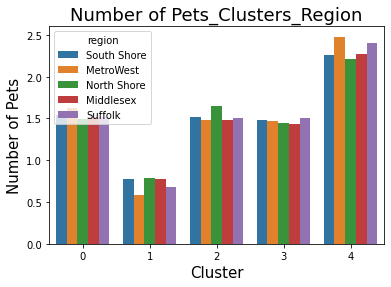

In [44]:
sns.barplot(x='Cluster', y='number_pets', hue='region', ci=None, data=boston_5)
plt.xlabel('Cluster', size=15)
plt.ylabel('Number of Pets', size=15)
plt.title('Number of Pets_Clusters_Region', size=18)

For clusters, Cluster 1 is obvious that people don't love pets, but people of Cluster 4 are definitely pet lovers. For regions, it's interesting because people from MetroWest and belong to Cluster 1, they are the most reluctant to have pets. But people from same region belong to Cluster 4 are the most willing to have pets. It seems attitudes toward pets in MetroWest are more polarized among different groups of people.

Text(0.5, 1.0, 'Household Income_Clusters')

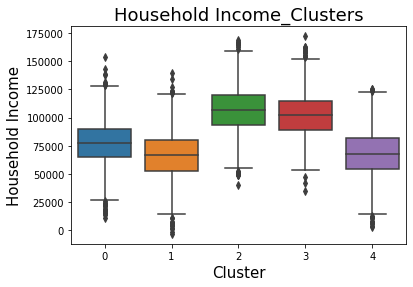

In [45]:
sns.boxplot(x='Cluster',y='household_income',data=boston_5)
plt.xlabel('Cluster', size=15)
plt.ylabel('Household Income', size=15)
plt.title('Household Income_Clusters', size=18)

This chart shows Cluster 2 has highest income, and Cluster 3 has second highest income. Cluster 1 and Cluster 4 have low income. 

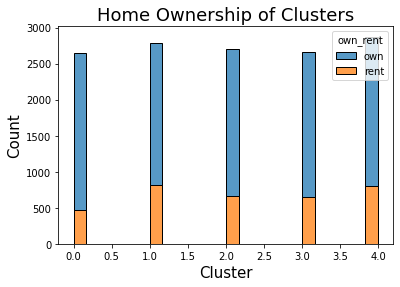

In [46]:
sns.histplot(x='Cluster', hue="own_rent",multiple="stack",data=boston_5)
plt.xlabel('Cluster', size=15)
plt.ylabel('Count', size=15)
plt.title('Home Ownership of Clusters', size=18);

This chart shows most people own houses rather than renting. Compare with other clusters, Cluster 0 has the least number of people renting rooms.

Text(0.5, 1.0, 'Extertainment Spending of Clusters')

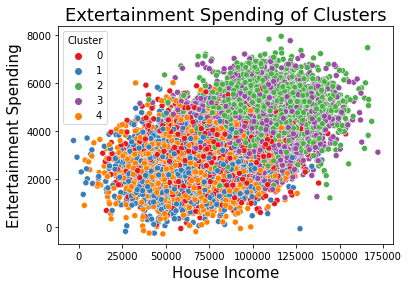

In [47]:
sns.scatterplot(x='household_income', y='entertainment_spend_est',hue="Cluster",palette='Set1', data=boston_5)
plt.xlabel('House Income', size=15)
plt.ylabel('Entertainment Spending', size=15)
plt.title('Extertainment Spending of Clusters', size=18)

This sactter plot shows when house incoem goes up, entertainment spending goes up. Many clusters mixed up at the center, but the colors are still obvious, and you can see they do follow a trend from left-bottom corner to right-up corner. And orange and blue (Cluster 1 and Cluster 4) have low income and entertainment spending. 

Text(0.5, 1.0, 'Travel Spending of Clusters')

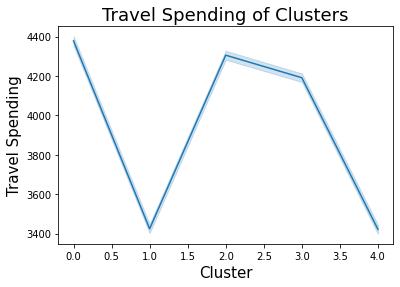

In [48]:
sns.lineplot(x="Cluster", y="travel_spend_est", data=boston_5)
plt.xlabel('Cluster', size=15)
plt.ylabel('Travel Spending', size=15)
plt.title('Travel Spending of Clusters', size=18)

This chart shows the travel spending of different clusters. Cluster 0 has highest travel spending, and Cluster 1 and Cluster 4 have low travel spending. 

**Target**

Cluster 0: focus on people who have very large house, and very love traveling.

Cluster 1: focus on people who have very small places, and have very low income, as well as entertainment spending and travel spedning.

Cluster 2: focus on family who have many members, and have very high income, entertainment spending, and traveling spending.

Cluster 3: focus on family which just has one member, but has very high income, entertainment spending, and travel spending.

Cluster 4: focus on people who have very low income, but very love pets.

**Name**:

Cluster 0: Thor.

Thor has a country to inherit, but he spends his days running around, even running to travel to Earth.

---
Cluster 1: Spiderman.

Spiderman lives in the Queen, and his house is small, and he has no income because he's high school student. Even he's adult, he still gets lowest money.

---
Cluster 2: Iron Man. 

Iron Man has beautiful family, and he's pretty rich and is willing to spend money on entertainment and traveling.

---
Cluster 3: Hulk.

Hulk has no family since he lost black widow. He always deliberately distanced himself from people because he could not control his anger. He might have high income because he's a doctor and scientist.  

---
Cluster 4: Capatain Marvel.

Captain Marvel is one of the few superheroes with a pet in the Marvel movies. Her pet (Chewie) looks like a cat, but it's actually a flerken.




With the consideration of **copyright**. We think:

1. The lobnsterland is just fictious park, it won't be a problem.
2. If we just use names to help the manager to better understand clusters rather than going public, it won't be a problem, either.
3. Even if someday lobsterland will be a true park someday, the manager could create five mascots based on the description of each cluster, like lobster warrior, lobster adventure... On the one hand, it could aviod copyright issue. On the another hand, we think a good park should have its own culture, like mascots which can increase the brand recognition and the sense of belonging of customers.

## Conjoint Analysis

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("bbq_summer.csv")
df

,bundleID,starter,maindishI,maindishII,side,dessert,avg_rating
0,1,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Blondie Brownie,6.040
1,2,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Apple Pie a la Mode,9.290
2,3,Fried Chicken Tenders,BBQ Brisket,Sausage,Potato Salad,Blondie Brownie,6.200
3,4,Fried Chicken Tenders,BBQ Brisket,Sausage,Potato Salad,Apple Pie a la Mode,8.840
4,5,Fried Chicken Tenders,BBQ Brisket,Sausage,French Fry Platter,Blondie Brownie,8.240
...,...,...,...,...,...,...,...
379,380,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,4.738
380,381,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,Potato Salad,Blondie Brownie,4.768
381,382,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,Potato Salad,Apple Pie a la Mode,6.248
382,383,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,French Fry Platter,Blondie Brownie,7.138


In [51]:
df_dumm = pd.get_dummies(df, drop_first=True, columns=['starter', 'maindishI', 'maindishII', 'side','dessert'])
df_dumm

,bundleID,avg_rating,starter_Fried Chicken Tenders,starter_Jumbo Shrimp Cocktail,starter_Sticky Chicken Tenders,maindishI_BBQ Chicken,maindishI_Buffalo Chicken Macaroni Stacker,maindishI_Pulled Pork,maindishII_Lobster Roll,maindishII_Sausage,maindishII_Steak Sampler,side_Mac and Cheese,side_Potato Salad,dessert_Blondie Brownie
0,1,6.040,1,0,0,0,0,0,0,1,0,1,0,1
1,2,9.290,1,0,0,0,0,0,0,1,0,1,0,0
2,3,6.200,1,0,0,0,0,0,0,1,0,0,1,1
3,4,8.840,1,0,0,0,0,0,0,1,0,0,1,0
4,5,8.240,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,4.738,0,1,0,0,1,0,0,0,1,1,0,0
380,381,4.768,0,1,0,0,1,0,0,0,1,0,1,1
381,382,6.248,0,1,0,0,1,0,0,0,1,0,1,0
382,383,7.138,0,1,0,0,1,0,0,0,1,0,0,1


In [52]:
df_dumm.columns

Index(['bundleID', 'avg_rating', 'starter_Fried Chicken Tenders',
       'starter_Jumbo Shrimp Cocktail', 'starter_Sticky Chicken Tenders',
       'maindishI_BBQ Chicken', 'maindishI_Buffalo Chicken Macaroni Stacker',
       'maindishI_Pulled Pork', 'maindishII_Lobster Roll',
       'maindishII_Sausage', 'maindishII_Steak Sampler', 'side_Mac and Cheese',
       'side_Potato Salad', 'dessert_Blondie Brownie'],
      dtype='object')

In [53]:
X = df_dumm[[ 'starter_Fried Chicken Tenders',
       'starter_Jumbo Shrimp Cocktail', 'starter_Sticky Chicken Tenders',
       'maindishI_BBQ Chicken', 'maindishI_Buffalo Chicken Macaroni Stacker',
       'maindishI_Pulled Pork', 'maindishII_Lobster Roll',
       'maindishII_Sausage', 'maindishII_Steak Sampler', 'side_Mac and Cheese',
       'side_Potato Salad', 'dessert_Blondie Brownie']]
y = df_dumm['avg_rating']

from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [54]:
regressor.intercept_

7.140387500000002

In [55]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
starter_Fried Chicken Tenders,0.133571
starter_Jumbo Shrimp Cocktail,-0.630588
starter_Sticky Chicken Tenders,0.339275
maindishI_BBQ Chicken,-0.209208
maindishI_Buffalo Chicken Macaroni Stacker,0.536821
maindishI_Pulled Pork,0.529312
maindishII_Lobster Roll,1.048096
maindishII_Sausage,0.331992
maindishII_Steak Sampler,-0.500462
side_Mac and Cheese,0.575125


Only review-oriented:

starter_Sticky Chicken Tenders	
maindishI_Buffalo Chicken Macaroni Stacker	
maindishII_Lobster Roll	
side_Mac and Cheese	
dessert_Apple Pie a la Mode	

In [56]:
df2 = pd.read_csv("vendor_costs_spring_2022 - Sheet1.csv")
df2

,Item,Item Category,Cost Per Serving (Dollars)
0,Fried Chicken Tenders,Starters,3.40
1,Bacon Fries,Starters,3.10
2,Sticky Chicken Tenders,Starters,2.90
3,Jumbo Shrimp Cocktail,Starters,4.60
4,BBQ Brisket,Main Dish I,6.00
5,Pulled Pork,Main Dish I,5.70
6,BBQ Chicken,Main Dish I,5.30
7,Buffalo Chicken Macaroni Stacker,Main Dish I,6.10
8,Sausage,Main Dish II,4.70
9,Lobster Roll,Main Dish II,5.20


In [57]:
2.9 + 6.1 + 5.2 + 0.45 + 1.1   # > $15 fee charged

15.749999999999998

Optimal food review under budget:

starter_Sticky Chicken Tenders  -we already have the cheapest

maindishI_Pulled Pork  -saves 0.4

maindishII_Sausage saves  -0.5

side_Mac and Cheese

dessert_Apple Pie a la Mode

    -> fianl cost = 14.85
    

Memo for the management team

![conjoint%20analysis_memo.jpg](attachment:conjoint%20analysis_memo.jpg)

## Forecasting Total Spending

In [58]:
lyv_ni = pd.read_csv("LYV_NI.csv", index_col='Date', parse_dates=True)

In [59]:
lyv_ni.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2016-12-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Net Income  6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [60]:
lyv_ni.columns

Index(['Net Income'], dtype='object')

In [61]:
lyv_ni

,Net Income
Date,
2016-12-31,20297
2017-12-31,7774
2018-12-31,90340
2019-12-31,118212
2020-12-31,-1827790
2021-12-31,-608786


In [62]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
alpha = 0.3
model = SimpleExpSmoothing(lyv_ni['Net Income']).fit(alpha)
lyv_prediction = model.forecast(2).rename('2022 Forecast')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


**Simple Exponential Smoothing**
 

In [63]:
lyv_prediction

2022-12-31   -538215.193743
2023-12-31   -538215.193743
Freq: A-DEC, Name: 2022 Forecast, dtype: float64

In [64]:
model.params

{'damping_slope': nan,
 'initial_level': 0.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.3,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

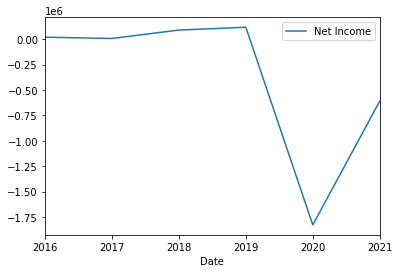

In [65]:
lyv_ni.plot()

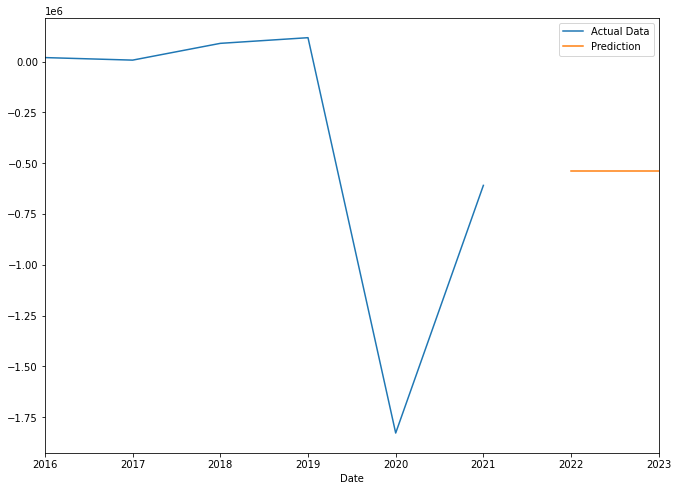

In [66]:
lyv_ni['Net Income'].plot(legend=True, label='Actual Data', figsize=(11,8))
lyv_prediction.plot(legend=True, label='Prediction');
plt.legend()

First, we found the 10-k of LYV from 2019 to 2022. And based on these docements, we got the net income from 2016 to 2021 at statement of operations. Then, we created the time series dataset. And we used simple exponential smoothing method to forecast the net income of next two years, which is about -$538215.19 (in thousands). 

## Classification

In [67]:
%cd C:\Users\Administrator\Desktop\spring s\654\final project

[Errno 2] No such file or directory: 'C:UsersAdministratorDesktopspring s654final project'
/content


homeState indicates the state of residence for this household.  Possible values here include: Maine, New Hampshire, Vermont, New York, Quebec, Ontario, Massachusetts    ,Connecticut
Rhode Island, US_Other, , and Can_Other.  US_Other includes all US states other than the ones already specifically named as separate categories.  
Can_Other includes
all Canadian provinces other than the ones already specifically named (Quebec and Ontario). 

stream_subs indicates the total number of streaming entertainment service subscriptions among all members of the household.  These could include music services like Spotify/Pandora as well as video services like Netflix, Disney+, Hulu+, etc.  

In [68]:
import pandas as pd
import numpy as np

carnival_visitors=pd.read_csv('carnival_visitors.csv')

In [69]:
carnival_visitors

,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,1,113831,418044,Finance,45,4,12,Maine,LuxurySedan,5,consume
1,2,66441,454233,Tech,44,4,11,Maine,LuxurySedan,1,entertain
2,3,160024,602594,Finance,38,2,6,Vermont,LuxurySedan,2,consume
3,4,82985,473262,Govt,39,3,8,Massachusetts,LuxurySedan,4,entertain
4,5,109369,527138,Finance,43,5,5,Massachusetts,SUV,3,consume
...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,136586,443222,Tech,48,3,11,Maine,SUV,1,consume
14996,14997,113057,540067,Govt,42,2,16,New York,Pickup,1,consume
14997,14998,103937,507584,Tech,48,6,10,Ontario,Sedan,4,consume
14998,14999,137577,528343,Tech,38,3,12,Vermont,Compact/Hybrid,1,entertain


In [70]:
carnival_visitors.isnull().sum()

householdID         0
est_inc_USD         0
est_netw_USD        0
hhold_field         0
hhold_oldest        0
hhold_pax           0
hhold_youngest      0
homeState           0
hhold_car         551
stream_subs         0
primary             0
dtype: int64

In [71]:
carnival_visitors.describe()

,householdID,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,94350.965000,466169.094800,45.327400,4.458933,14.984133,3.990933
std,4330.271354,27826.069636,71050.877531,4.966017,1.796106,8.361085,1.746383
min,1.000000,-2537.000000,180540.000000,25.000000,1.000000,1.000000,0.000000
25%,3750.750000,75246.750000,418090.500000,42.000000,3.000000,11.000000,3.000000
50%,7500.500000,93209.500000,466061.000000,45.000000,4.000000,13.000000,4.000000
75%,11250.250000,113346.250000,514245.250000,49.000000,6.000000,16.000000,5.000000
max,15000.000000,204057.000000,774358.000000,66.000000,12.000000,62.000000,11.000000


In [72]:
carnival_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   householdID     15000 non-null  int64 
 1   est_inc_USD     15000 non-null  int64 
 2   est_netw_USD    15000 non-null  int64 
 3   hhold_field     15000 non-null  object
 4   hhold_oldest    15000 non-null  int64 
 5   hhold_pax       15000 non-null  int64 
 6   hhold_youngest  15000 non-null  int64 
 7   homeState       15000 non-null  object
 8   hhold_car       14449 non-null  object
 9   stream_subs     15000 non-null  int64 
 10  primary         15000 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [73]:
carnival_visitors=carnival_visitors[carnival_visitors['hhold_car'].notna()]

In [74]:
carnival_visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14449 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   householdID     14449 non-null  int64 
 1   est_inc_USD     14449 non-null  int64 
 2   est_netw_USD    14449 non-null  int64 
 3   hhold_field     14449 non-null  object
 4   hhold_oldest    14449 non-null  int64 
 5   hhold_pax       14449 non-null  int64 
 6   hhold_youngest  14449 non-null  int64 
 7   homeState       14449 non-null  object
 8   hhold_car       14449 non-null  object
 9   stream_subs     14449 non-null  int64 
 10  primary         14449 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [75]:
carnival_visitors[carnival_visitors['est_inc_USD']<=0]

,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
7813,7814,-2537,258661,Education,49,4,14,New Hampshire,LuxurySedan,3,entertain


In [76]:
carnival_visitors=carnival_visitors.drop([7813],axis=0)

### negative income as an outlier should be moved 

In [77]:
carnival_visitors.head()

,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,1,113831,418044,Finance,45,4,12,Maine,LuxurySedan,5,consume
1,2,66441,454233,Tech,44,4,11,Maine,LuxurySedan,1,entertain
2,3,160024,602594,Finance,38,2,6,Vermont,LuxurySedan,2,consume
3,4,82985,473262,Govt,39,3,8,Massachusetts,LuxurySedan,4,entertain
4,5,109369,527138,Finance,43,5,5,Massachusetts,SUV,3,consume


In [78]:
X=carnival_visitors.drop(['householdID','primary'],axis=1)
X=pd.get_dummies(X)
X.head()

,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs,hhold_field_Education,hhold_field_Finance,hhold_field_Govt,hhold_field_Manufacturing,...,homeState_Ontario,homeState_Quebec,homeState_Rhode Island,homeState_US_Other,homeState_Vermont,hhold_car_Compact/Hybrid,hhold_car_LuxurySedan,hhold_car_Pickup,hhold_car_SUV,hhold_car_Sedan
0,113831,418044,45,4,12,5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,66441,454233,44,4,11,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,160024,602594,38,2,6,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,82985,473262,39,3,8,4,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,109369,527138,43,5,5,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
X.columns

Index(['est_inc_USD', 'est_netw_USD', 'hhold_oldest', 'hhold_pax',
       'hhold_youngest', 'stream_subs', 'hhold_field_Education',
       'hhold_field_Finance', 'hhold_field_Govt', 'hhold_field_Manufacturing',
       'hhold_field_Other', 'hhold_field_Services', 'hhold_field_Tech',
       'homeState_Can_Other', 'homeState_Connecticut', 'homeState_Maine',
       'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont',
       'hhold_car_Compact/Hybrid', 'hhold_car_LuxurySedan', 'hhold_car_Pickup',
       'hhold_car_SUV', 'hhold_car_Sedan'],
      dtype='object')

In [80]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y=LE.fit_transform(carnival_visitors['primary'])

In [81]:
print([carnival_visitors['primary'],Y])

[0          consume
1        entertain
2          consume
3        entertain
4          consume
           ...    
14995      consume
14996      consume
14997      consume
14998    entertain
14999      consume
Name: primary, Length: 14448, dtype: object, array([0, 1, 0, ..., 0, 1, 0])]


In [82]:
pd.value_counts(Y)

1    7347
0    7101
dtype: int64

In [83]:
pd.value_counts(Y,normalize=True)

1    0.508513
0    0.491487
dtype: float64

### Radndom Forest

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf0=RandomForestClassifier(oob_score=True,random_state=13)

In [86]:
rf0.fit(X_train,y_train)
print(rf0.oob_score_)

0.5124097696034806


In [87]:
y_pred=rf0.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5130334486735871


In [88]:
from sklearn.model_selection import GridSearchCV
clf=RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 80,110,130,150],
    'max_depth': [2,4,6,8],
    'max_features': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8]}
param_grid

{'max_depth': [2, 4, 6, 8],
 'max_features': [4, 8, 12, 16],
 'min_samples_leaf': [2, 4, 6, 8],
 'n_estimators': [50, 80, 110, 130, 150]}

In [89]:
CV_rfc = GridSearchCV(estimator=clf,param_grid=param_grid,cv= 5)

In [90]:
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [4, 8, 12, 16],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'n_estimators': [50, 80, 110, 130, 150]})

In [91]:
print(CV_rfc.best_params_)

{'max_depth': 2, 'max_features': 12, 'min_samples_leaf': 2, 'n_estimators': 130}


In [92]:
rf1=RandomForestClassifier(max_depth= 2, max_features= 8, min_samples_leaf= 8, n_estimators= 110,random_state=112)##只是设置参数 还没fit

In [93]:
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=8, min_samples_leaf=8,
                       n_estimators=110, random_state=112)

In [94]:
y_pred1=rf1.predict(X_test)

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.5259515570934256


In [96]:
diff=(0.5259515570934256-0.5130334486735871)/0.5130334486735871
diff

0.02517985611510772

### the accuracy have increased 2.5% ,but still low just about 53% accurate.

feature importance sort

In [97]:
feature_imp_df = pd.DataFrame(list(zip(rf1.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df=feature_imp_df.sort_values(by='feature importance',ascending=False)
feature_imp_df

,feature importance,feature
1,0.460967,est_netw_USD
0,0.124839,est_inc_USD
2,0.085726,hhold_oldest
4,0.070464,hhold_youngest
3,0.054087,hhold_pax
5,0.038540,stream_subs
20,0.023674,homeState_Quebec
15,0.021741,homeState_Maine
13,0.016924,homeState_Can_Other
10,0.015377,hhold_field_Other


In [98]:
importance=feature_imp_df[feature_imp_df['feature importance']>=0.02]
importance

,feature importance,feature
1,0.460967,est_netw_USD
0,0.124839,est_inc_USD
2,0.085726,hhold_oldest
4,0.070464,hhold_youngest
3,0.054087,hhold_pax
5,0.038540,stream_subs
20,0.023674,homeState_Quebec
15,0.021741,homeState_Maine


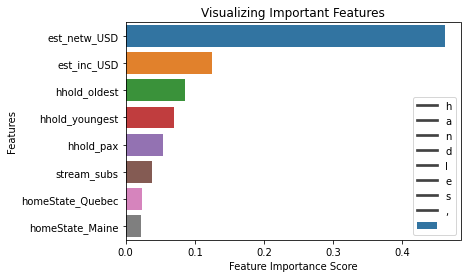

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=importance['feature importance'], y=importance['feature'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend('handles, labels')
plt.show()

net worth of the household's members shows highest feature importance when predict goal of member of household attend a winter carnival event (0.46),and the second highest feature importance belongs to an estimate of the total income for all members of the household),it's importance is just 0.12, which just a quarter of the feature importance net worth of the household's members.The feature importance of variables other than these two is less than 0.01, which means they contributed rare value for model construction ,maybe this also is the reason why we obtain poor accurte of model performance.

we can remove variables that feature importance lower than 2% because it will have significant effects on our model performance.

the results of feature importance sequence make some sense, because a large part of the purpose of sightseeing is determined by factors related to money. Some households with higher net worth may call their main focus on shopping and enjoy food, so their main purpose may be consuming.However, families with lower net worth, they may be more willing to enjoy live shows, performance acts, concerts, ice sculpture contests and other activities.

In the explanation of household wealth, household net worth is more convincing than total household income, so its feature are more important. In addition to this, the age of family members should also have an impact on their purpose, as families with older family members may not be able to enjoy louder activities such as concerts, game competitions, etc. They may prefer to shopping and dining. The opposite is true for family members with younger ages, who may be more inclined towards activities like live shows, performance acts, etc. for younger people.

### Confusion matrix 

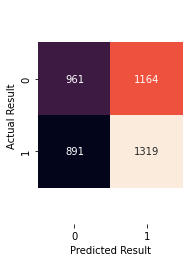

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred1=rf1.predict(X_test)
mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [101]:
from sklearn import metrics
y_pred1=rf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


Accuracy: 0.5259515570934256


In [102]:
y_pred_tr=rf1.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_tr))

Accuracy: 0.5410857312370216


the gap between  accuracy of X_train prediction result and  accuracy of X_test prediction result  is quite small, so we don't need to worry about overfitting problem

In [103]:
from sklearn import metrics 
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48      2125
           1       0.53      0.60      0.56      2210

    accuracy                           0.53      4335
   macro avg       0.53      0.52      0.52      4335
weighted avg       0.53      0.53      0.52      4335



If the purpose of our model is to predict whether the main purpose of a family member's visit is entertainment, then entertainment is the postive class（1 represents entertainment）

i.  model’s accuracy rate? 0.53


ii. model’s sensitivity rate? 0.6


iii.model’s specificity rate? 0.45


iv. model’s precision? 0.53


v. model’s balanced accuracy?0.525

### Logistic regression

In [104]:
importance

,feature importance,feature
1,0.460967,est_netw_USD
0,0.124839,est_inc_USD
2,0.085726,hhold_oldest
4,0.070464,hhold_youngest
3,0.054087,hhold_pax
5,0.038540,stream_subs
20,0.023674,homeState_Quebec
15,0.021741,homeState_Maine


In [105]:
X_new=X[['est_netw_USD','est_inc_USD','hhold_oldest','hhold_youngest','hhold_pax','stream_subs','homeState_Quebec','homeState_Maine']]

In [106]:
X_new.corr()

,est_netw_USD,est_inc_USD,hhold_oldest,hhold_youngest,hhold_pax,stream_subs,homeState_Quebec,homeState_Maine
est_netw_USD,1.000000,0.564453,0.005146,0.005033,-0.011076,-0.008733,0.011505,-0.005708
est_inc_USD,0.564453,1.000000,0.003690,-0.028552,0.003768,-0.010651,-0.001566,0.014399
hhold_oldest,0.005146,0.003690,1.000000,0.098091,-0.069719,-0.007980,-0.018235,-0.003521
hhold_youngest,0.005033,-0.028552,0.098091,1.000000,-0.447663,-0.000346,0.001940,-0.016677
hhold_pax,-0.011076,0.003768,-0.069719,-0.447663,1.000000,-0.009336,0.003122,0.024235
stream_subs,-0.008733,-0.010651,-0.007980,-0.000346,-0.009336,1.000000,-0.002470,-0.008669
homeState_Quebec,0.011505,-0.001566,-0.018235,0.001940,0.003122,-0.002470,1.000000,-0.224005
homeState_Maine,-0.005708,0.014399,-0.003521,-0.016677,0.024235,-0.008669,-0.224005,1.000000


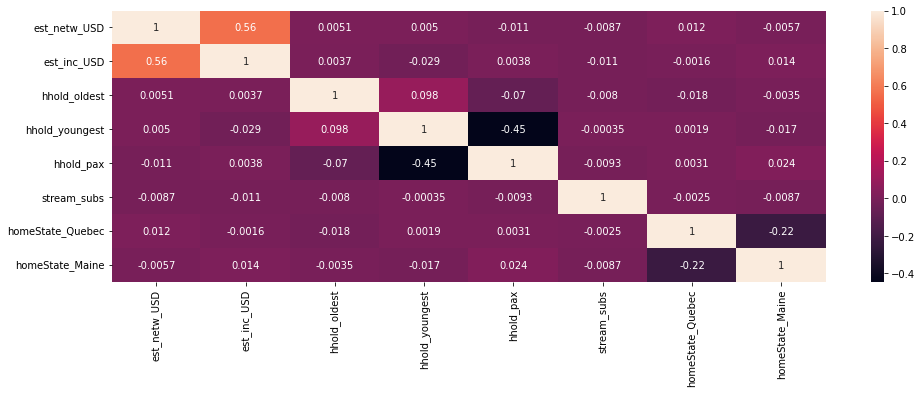

In [107]:
# plt.figure(figsize = (16,5))
# sns.heatmap(attractions2.corr(), annot=True);

plt.figure(figsize=(16,5))
sns.heatmap(X_new.corr(),annot=True)

### correlation between income and net wealth is less than 0.7 ,so it's less likely to cause Multi-collinearity, we don't drop any variable.

In [108]:
# from sklearn import preprocessing
# scaler=preprocessing.StandardScaler().fit(X_new)
#logic regression do not need to standarlize data normally

In [109]:
# X_new_stan=scaler.transform(X_new)
# # X_new_stan

In [110]:
from sklearn.model_selection import train_test_split
X_train_LO,X_test_LO,Y_train_LO,Y_test_LO=train_test_split(X_new,Y,test_size=0.3,random_state=112)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [112]:
logmodel=LogisticRegression()
logmodel.fit(X_train_LO,Y_train_LO)
prediction_LO=logmodel.predict(X_test_LO)
predic_train=logmodel.predict(X_train_LO)

In [113]:
train_train_acc=accuracy_score(Y_train_LO,predic_train)
train_test_acc=accuracy_score(Y_test_LO,prediction_LO)
print(train_train_acc,train_test_acc)

0.5073667556610304 0.510726643598616


In [114]:
X_train_LO

,est_netw_USD,est_inc_USD,hhold_oldest,hhold_youngest,hhold_pax,stream_subs,homeState_Quebec,homeState_Maine
11222,448850,113053,43,18,5,5,0,1
5936,570806,102034,54,15,6,6,0,1
11240,398359,77637,46,4,2,5,0,0
1296,490595,77535,46,17,5,7,0,0
14468,462957,112285,39,13,4,6,0,1
...,...,...,...,...,...,...,...,...
13816,453512,150918,44,14,5,2,0,0
2467,347716,71104,60,8,4,1,1,0
7954,461811,107015,51,17,3,3,0,1
235,495855,132680,48,9,5,7,0,1


the accuracy gap between train_x_train_y and test_x_test_y is quite small , so no need to worry about overfitting

In [115]:
coee_df=pd.DataFrame(data=logmodel.coef_.transpose(),index=X_train_LO.columns,columns=['Coef'])

In [116]:
coee_df

,Coef
est_netw_USD,2.858397e-07
est_inc_USD,-8.636945e-07
hhold_oldest,-4.293205e-09
hhold_youngest,-1.584957e-09
hhold_pax,-1.612974e-10
stream_subs,-2.012010e-10
homeState_Quebec,4.631751e-11
homeState_Maine,-2.904507e-11


In [117]:
570806*2.858397e-07

0.1631590157982

In [118]:
150918*-8.636945e-07

-0.13034704655100002

### the result of coefficient is quite surprise low than we expected, which shows that An increase of  100,000 in total household income will reduces the likelihood of participating in outdoor festivals for entertainment by about 80%. 

### Conversely, if the estimate of the total income for all members of the household increases by 100,000, the probability that the purpose of the family income festival is entertainment increases by 28%.

### and for all other coefficient, managers can just ignore them , because the coefficient is really small,and it will never have a big change for anykind of family even though family's feature have significant change. for example for oldest member of the household feature, it will never have obvious effects except if increase or decrease 1000000000, this can never happen in human being.

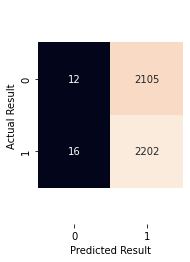

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test_LO, prediction_LO)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [120]:
print(metrics.classification_report(Y_test_LO, prediction_LO))

              precision    recall  f1-score   support

           0       0.43      0.01      0.01      2117
           1       0.51      0.99      0.67      2218

    accuracy                           0.51      4335
   macro avg       0.47      0.50      0.34      4335
weighted avg       0.47      0.51      0.35      4335



### if we choose entertainment as postive class ,（entertainment--1）

#### i.  model’s accuracy rate? 0.51
#### ii. model’s sensitivity rate? 0.99 ---the True postive rate is extemely high,which means if a customer really come to entertain purpose, and our model have 99% can identify it.
#### iii.model’s specificity rate? 0.01--the False negative rate is extremely low ,which means this model is not suitable to identify family that coming for cunsuming .
#### iv. model’s precision? 0.51
#### v. model’s balanced accuracy?0.34

### random fore

#### If the purpose of our model is to predict whether the main purpose of a family member's visit is entertainment, then entertainment is the postive class（1 represents entertainment）

#### i.  model’s accuracy rate? 0.53
#### ii. model’s sensitivity rate? 0.6
#### iii.model’s specificity rate? 0.45
#### iv. model’s precision? 0.53
#### v. model’s balanced accuracy?0.525

###  From the results of the two models, the variables that can be used to predict the purpose of household attendance at a winter carnival event are an estimate of the total income for all members of the household and an estimate of the combined net worth of the household's members.

### In the random forest model, the model gave the net worth of the household's members variable the greatest importance (0.46), and the total income variable the second most important (0.12). In the logistic regression model, net worth of the household's members was more explanatory than total income for predicting household attendance at carnival events,but the coefficient for two variable in logistic regression is very small.

### In terms of prediction accuracy, neither model performed particularly well, both were around 50% accurate (Logistic Regression - 51%, Random Forest - 53%). But logistic regression is particularly sensitive to families attending for entertainment purposes, which means that when the real purpose of the family is entertainment, the model can predict 99 percent of the time correctly. so logistic regression can be used to verify if family is coming for entertainment nnder a premisewe that we are pretty sure they are coming for entertainment.

### According to the above summary, the reason for the poor prediction results of the two models is that most of the characteristics of the adopted users are not suitable for such prediction. In addition, the results of the model show that money-related factors greatly influence the purpose of family attendance, so if Lobster Land wants to significantly improve the accuracy of predicting the reasons for family attendance, it may need to consider collecting more Money-related information, such as whether the household has purchased discounted tickets, the household's main expense category, etc. In addition to that, they should collect information on new family members, maybe lobster land can use questionnaires to collect the reasons that may affect their attendance at outdoor festivals, instead of collecting some irrelevant information.

### In the short term, if lobster land wants to improve the accuracy of predictions, a random forest model should be used. 

### So what's the use of our predictions? Imagine that lobsterland invites a lot of good bands to give concerts in order to enhance their reputation. So they want to get as many people as possible without selling concert tickets at too low a price. At this time, they can use the classification model to send discount codes to those families who are judged by the model to be consumption-oriented. As you can see from this formula, we use a price-discriminatory marketing strategy to only give discounts to those families whose purpose is consumption, while those families that are originally intended for entertainment need to buy tickets at full price.

### Therefore, we think the next thing lobster land needs to do is to improve the accuracy of the model predictions, so that we can more accurately predict the purpose of family attendance, increase profits and improve reputation.to improve the accuracy of the prediction model, lobsterland should collect more user data, such as the time since the last trip to the park, the number of boys in the family, and so on.


## Statistical Testing

In [121]:
%cd C:\Users\DKDK1\Documents\Daniel\ISM Hamburg\Semesterorganisation\4. Semester Boston\AD654 Marketing Analytics\Assignments\Project

[Errno 2] No such file or directory: 'C:UsersDKDK1DocumentsDanielISM HamburgSemesterorganisation4. Semester BostonAD654 Marketing AnalyticsAssignmentsProject'
/content


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
concert = pd.read_csv("concert_pics.csv")

### Descriptive analysis

In [124]:
concert.shape

(3400, 5)

In [125]:
concert.isnull().values.any()

False

In [126]:
concert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recipient      3400 non-null   int64  
 1   pic_seen       3400 non-null   object 
 2   site_duration  3400 non-null   float64
 3   spend          3400 non-null   float64
 4   register       3400 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 132.9+ KB


In [127]:
concert.head()

,recipient,pic_seen,site_duration,spend,register
0,1,Chili_Peppers,18.2,16.6,1
1,2,Foo,21.2,15.3,0
2,3,Billie,10.9,11.5,1
3,4,Billie,11.3,17.8,0
4,5,Chili_Peppers,19.7,17.3,0


In [128]:
concert.describe()

,recipient,site_duration,spend,register
count,3400.000000,3400.000000,3400.000000,3400.000000
mean,1700.500000,16.879529,14.842088,0.357059
std,981.639785,5.543245,2.359465,0.479203
min,1.000000,5.900000,5.600000,0.000000
25%,850.750000,11.200000,13.200000,0.000000
50%,1700.500000,16.700000,15.200000,0.000000
75%,2550.250000,22.000000,16.700000,1.000000
max,3400.000000,31.100000,22.300000,1.000000


### Data manipulation

In [129]:
concert['pic_seen'] = pd.Categorical(concert.pic_seen)
concert.dtypes

recipient           int64
pic_seen         category
site_duration     float64
spend             float64
register            int64
dtype: object

In [130]:
concert.head()

,recipient,pic_seen,site_duration,spend,register
0,1,Chili_Peppers,18.2,16.6,1
1,2,Foo,21.2,15.3,0
2,3,Billie,10.9,11.5,1
3,4,Billie,11.3,17.8,0
4,5,Chili_Peppers,19.7,17.3,0


### Overview of Data Distribution - Plot dataset

Text(0.5, 1.0, 'Picture seen by spend')

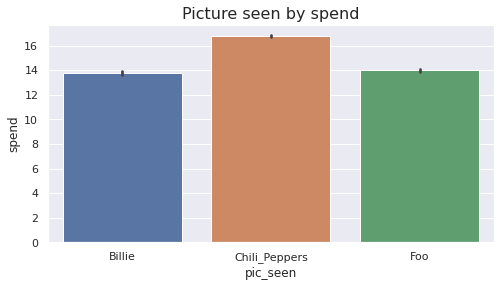

In [131]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.barplot(x='pic_seen', y='spend', data=concert)
plt.title('Picture seen by spend', fontsize=16)

Text(0.5, 1.0, 'Difference in spend for registered and non-registered')

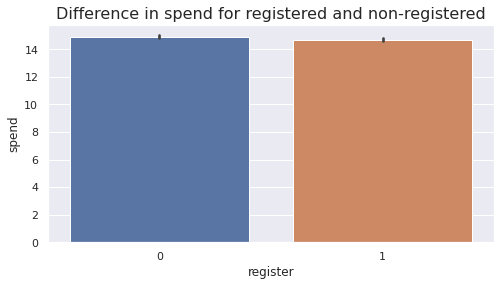

In [132]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.barplot(x='register', y='spend', data=concert)
plt.title('Difference in spend for registered and non-registered', fontsize=16)

Text(0.5, 1.0, 'Picture seen by site duration')

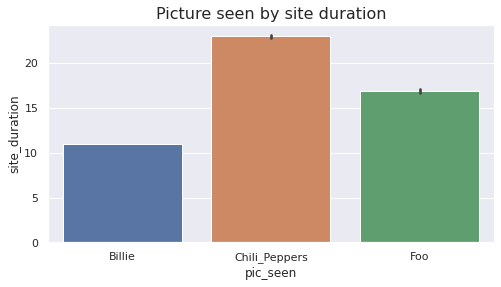

In [133]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.barplot(x='pic_seen', y='site_duration', data=concert)
plt.title('Picture seen by site duration', fontsize=16)

Text(0.5, 1.0, 'Difference in site_duration for registered and non-registered')

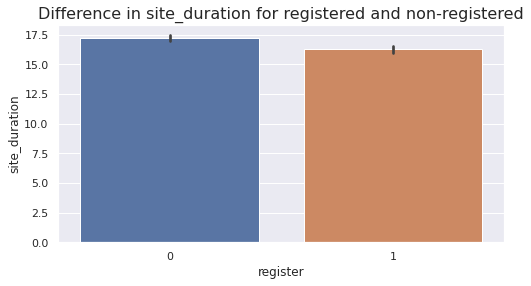

In [134]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.barplot(x='register', y='site_duration', data=concert)
plt.title('Difference in site_duration for registered and non-registered', fontsize=16)

### Summary Stats

In [135]:
concert.groupby(by ='pic_seen').describe()['recipient']

,count,mean,std,min,25%,50%,75%,max
pic_seen,,,,,,,,
Billie,1142.0,1734.473730,977.916270,3.0,870.25,1785.0,2560.50,3398.0
Chili_Peppers,1110.0,1693.945946,993.119415,1.0,820.50,1688.5,2573.50,3400.0
Foo,1148.0,1673.040941,974.007851,2.0,847.75,1644.5,2511.75,3399.0


In [136]:
concert.groupby(by ='pic_seen').describe()['site_duration']

,count,mean,std,min,25%,50%,75%,max
pic_seen,,,,,,,,
Billie,1142.0,10.975394,0.513019,9.3,10.6,11.0,11.3,12.7
Chili_Peppers,1110.0,22.949189,2.177733,14.8,21.5,23.0,24.4,30.7
Foo,1148.0,16.884059,3.981340,5.9,14.0,16.9,19.6,31.1


In [137]:
concert.groupby(by ='pic_seen').describe()['spend']

,count,mean,std,min,25%,50%,75%,max
pic_seen,,,,,,,,
Billie,1142.0,13.786778,2.434803,5.6,12.2,13.8,15.4,22.3
Chili_Peppers,1110.0,16.781892,0.855189,14.3,16.2,16.8,17.4,19.2
Foo,1148.0,14.016289,2.111914,7.4,12.6,14.0,15.5,20.9


### Statistical test
#### Step 1: Check distribution trhough variable plotting

Text(0.5, 1.0, 'Spend by picture')

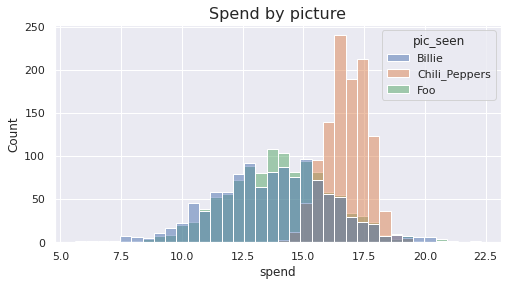

In [138]:
sns.histplot(data=concert, x="spend", hue = "pic_seen")
plt.title('Spend by picture', fontsize=16)

Text(0.5, 1.0, 'Site_duration by picture')

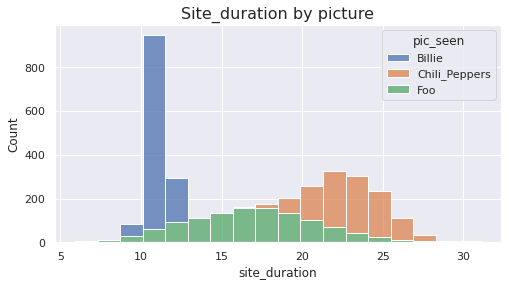

In [139]:
sns.histplot(data=concert, x="site_duration", hue = "pic_seen", multiple="stack")
plt.title('Site_duration by picture', fontsize=16)

Text(0.5, 1.0, 'Site_duration by picture')

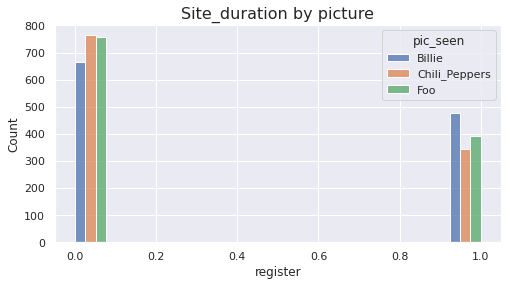

In [140]:
sns.histplot(data=concert, x="register", hue = "pic_seen", multiple="dodge")
plt.title('Site_duration by picture', fontsize=16)

Text(0.5, 1.0, 'Distribution of site_duration')

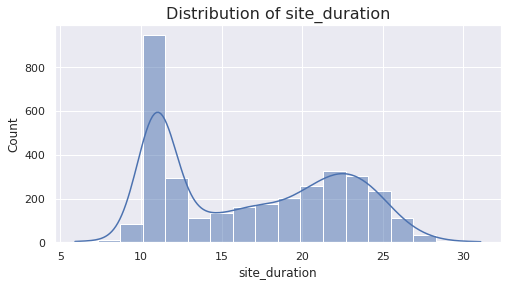

In [141]:
sns.histplot(data=concert, x="site_duration", kde = True)
plt.title('Distribution of site_duration', fontsize=16)

Text(0.5, 1.0, 'Distribution of spend')

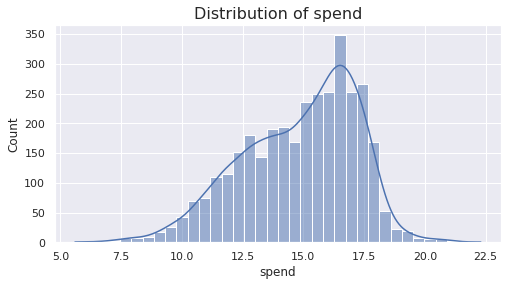

In [142]:
sns.histplot(data=concert, x="spend", kde = True)
plt.title('Distribution of spend', fontsize=16)

Text(0.5, 1.0, 'Distribution of register')

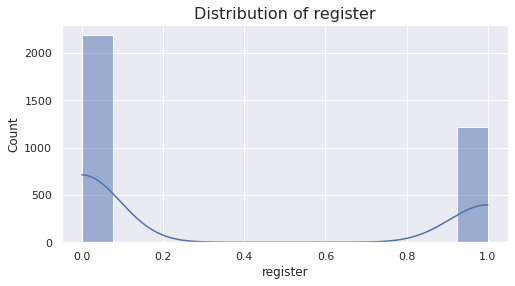

In [143]:
sns.histplot(data=concert, x="register", kde = True)
plt.title('Distribution of register', fontsize=16)

#### Test for normal distribution

In [144]:
import scipy
import scipy.stats
from scipy import stats
from scipy.stats import chisquare

In [145]:
#test for normal distribution variable "spend"

#Ho: spend is not significantly different from a normal distribution.
#H1: spend is significantly different from a normal distribution.
#P-value = 0.05
scipy.stats.shapiro(concert['spend'])

(0.9729257225990295, 6.859182055713564e-25)

Given the small p-value (6.859182055713564e-25) which is smaller than 0.05 (<0.05), we reject the null hypothesis and conclude that the spend is significantly different from a normal distribution.

In [146]:
#test for normal distribution variable "site_duration"

#Ho: site_duration is not significantly different from a normal distribution.
#H1: site_duration is significantly different from a normal distribution.
#P-value = 0.05
scipy.stats.shapiro(concert['site_duration'])

(0.896397590637207, 4.217908377617699e-43)

Given the small p-value (4.217908377617699e-43) which is smaller than 0.05 (<0.05), we reject the null hypothesis and conclude that the site_duration is significantly different from a normal distribution.

#### Summary of distribution test

As shown by the graphs and the Shapiro-Wilk test for normality the variables "spend" and "site_duration" follow both not a normal distribution. Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not.

Given this result a t-test will be used in the following since the sample size for each picture is reasonably large and equal distributed for all three pictures as shown in the summary stats part:

Billie        = 1142.0
Chili_Peppers = 1110.0
Foo           = 1148.0

### Lobster Land must choose just one of these three pictures for its 2022 Portland Calling marketing campaign.
#### Step 2: Statistical testing for the three Pictures: Foo, Billie or Chili_Peppers

### T-Test - variable spend

In [147]:
#t-statistic: two sample t-test
#Picture "Billie" vs. Picture "Chili_Peppers"
#Ho: There is not meaningful difference between Picture "Billie" and Picture "Chili_Peppers"
#H1: There is a meaningful difference between Picture "Billie" and "Chili_Peppers"
#P-value aplha of (0.05)

ttest12,pvalue12 = stats.ttest_ind(concert.loc[concert['pic_seen']=="Billie", 'spend'].values, concert.loc[concert['pic_seen']=="Chili_Peppers", 'spend'].values, equal_var=False)
print(ttest12, pvalue12)

-39.15935565135458 2.5613546874880944e-228


Conclusion: We will reject the null hypothesis. There is a meaningful difference between spend for the pictures "Billie" and "Chili_Peppers".

In [148]:
#t-statistic: two sample t-test
#Picture "Billie" vs. Picture "Foo"
#Ho: There is not meaningful difference between Picture "Billie" and Picture "Foo"
#H1: There is a meaningful difference between Picture "Billie" and "Foo"
#P-value aplha of (0.05)

ttest13,pvalue13 = stats.ttest_ind(concert.loc[concert['pic_seen']=="Billie", 'spend'].values, concert.loc[concert['pic_seen']=="Foo", 'spend'].values, equal_var=False)
print(ttest13, pvalue13)

-2.409074784847322 0.016073256990741944


Conclusion: We will reject the null hypothesis. There is a meaningful difference between spend for the pictures "Billie" and "Foo".

In [149]:
#t-statistic: two sample t-test
#Picture "Chili_Peppers" vs. Picture "Foo"
#Ho: There is not meaningful difference between Picture "Chili_Peppers" and Picture "Foo"
#H1: There is a meaningful difference between Picture "Chili_Peppers" and "Foo"
#P-value aplha of (0.05)

ttest23,pvalue23 = stats.ttest_ind(concert.loc[concert['pic_seen']=="Chili_Peppers", 'spend'].values, concert.loc[concert['pic_seen']=="Foo", 'spend'].values, equal_var=False)
print(ttest23, pvalue23)

41.02687256136666 1.7008147207546044e-248


Conclusion: We will reject the null hypothesis. There is a meaningful difference between spend for the pictures "Chili_Peppers" and "Foo".

### T-Test - variable site_duration

In [150]:
#t-statistic: two sample t-test
#Picture "Billie" vs. Picture "Chili_Peppers"
#Ho: There is not meaningful difference between Picture "Billie" and Picture "Chili_Peppers"
#H1: There is a meaningful difference between Picture "Billie" and "Chili_Peppers"
#P-value aplha of (0.05)

ttest12,pvalue12 = stats.ttest_ind(concert.loc[concert['pic_seen']=="Billie", 'site_duration'].values, concert.loc[concert['pic_seen']=="Chili_Peppers", 'site_duration'].values, equal_var=False)
print(ttest12, pvalue12)

-178.43526393191596 0.0


Conclusion: We will reject the null hypothesis. There is a meaningful difference between site_duration for the pictures "Billie" and "Chili_Peppers".

In [151]:
#t-statistic: two sample t-test
#Picture "Billie" vs. Picture "Foo"
#Ho: There is not meaningful difference between Picture "Billie" and Picture "Foo"
#H1: There is a meaningful difference between Picture "Billie" and "Foo"
#P-value aplha of (0.05)

ttest13,pvalue13 = stats.ttest_ind(concert.loc[concert['pic_seen']=="Billie", 'site_duration'].values, concert.loc[concert['pic_seen']=="Foo", 'site_duration'].values, equal_var=False)
print(ttest13, pvalue13)

-49.869672043037916 2.4917690085295205e-293


Conclusion: We will reject the null hypothesis. There is a meaningful difference between site_duration for the pictures "Billie" and "Chili_Peppers".

In [152]:
#t-statistic: two sample t-test
#Picture "Chili_Peppers" vs. Picture "Foo"
#Ho: There is not meaningful difference between Picture "Chili_Peppers" and Picture "Foo"
#H1: There is a meaningful difference between Picture "Chili_Peppers" and "Foo"
#P-value aplha of (0.05)

ttest23,pvalue23 = stats.ttest_ind(concert.loc[concert['pic_seen']=="Chili_Peppers", 'site_duration'].values, concert.loc[concert['pic_seen']=="Foo", 'site_duration'].values, equal_var=False)
print(ttest23, pvalue23)

45.106567337820366 2.12730870029131e-297


Conclusion: We will reject the null hypothesis. There is a meaningful difference between site_duration for the pictures "Billie" and "Chili_Peppers".

### Discription of the process and your results for analyzing the results of these A/B Tests

First descriptive analysis was used to get an overview of the dataset and the types of variables. This was followed by data manipulation, where the char variable pic_seen was transformed to a factor to make it possible to analyze it in futher steps. As a next step this transformed variable (pic_seen) was plotted to get an first overview of the distribution of the three pictures for site_duration (measurement for the mean length of time for a visits to a website) and spending time for each picture. The pictures are more or less equally distributed over the sample in total counts (Billie = 1142.0, Chili_Peppers = 1110.0, Foo = 1148.0).

From the summary statistic and the plot can be seen that Chilli_Peppers has the highest mean for time spending on picture (16.8) comapre the the other two (Billie = 13.8, Foo = 14.0). The indicatior site_duration shows that Chilli_Peppers have the highest mean for time spending on that picture (23.0), comapare to Billie (11.0) and Foo (16.9). For the variables spend and site_duration there was only for site_duration a slightly higher number for non registered in site duration, which indicates that the sample is equally splitted for registered users of the online Marketing campaign and the non registered.

After this these first results were tested in an A/B test to validate the significance of the results. Therefore a Shapiro-Wilk test of normality was done to verify if the variables site_duratio and spend are normally distributed. Since both veraibles aren't normally distributed a t-test was used for the A/B test. The t-tests for both variables (spend, site_duration) showed that there is a meaningfull difference between all the pictures. Therefore we can rely on the observations before and can state that the picture Chilli_Peppers had a higher site_duration on the Loberster land homepage and that the recepeints spended more money when this picture was part of the marketing campaign.

In the light of these results we recommend Lobster Land to use the Chilli_Peppers picture for its 2022 Portland Calling marketing campaign because users (customers) will spend more time on the homepage and have a higher on average money spending when the picture Chilli_Peppers is part of the marketing campaign. Marketing and sales offers, which will be placed nearby or above/below this image will certainly attract more customer attention and more likely help Loberster Land to increase their sales of tickets or promotion of upcoming events.